In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df=pd.read_excel("Sample_Longlist_Data.xlsx")
df.head(1)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),"Lohas Living Inc James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 Email Address:jadgemaello@gmail.com James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 EIN: 30-0961431 \nThe European Commission provides for an Online Dispute Resolution Platform, which you can access here: https://ec.europa.eu/consumers/odr/\n\nPlease see the following link for the nationally appointed Alternative Dispute Resolution bodies contact details: https://webgate.ec.europa.eu/od...",Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-1410US,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/page/B9975298-FF1F-4EE2-BD7B-53AE47A44D8A?ref_=ast_bln


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller business na

In [4]:
df.shape

(1839, 18)

In [5]:
# All values in this dataset are recorded on 2020-11-15

df["Date Added"].nunique()  # All rows have same value ,its not that important ,so we can drop this column

1

- Since all entries have the same date, this column provides no useful variation and can be dropped. 

In [6]:
df["category"].nunique()  # If all rows belong to the same category (e.g., "Garden"), it provides no useful variation.

1

-  If all rows belong to the same category (e.g., "Garden"), this column is not useful for analysis and can be dropped. 

In [7]:
df["sellerlink"].nunique()  # even all rows have different values also we can drop that column 

1839

In [8]:
df["sellerlink-url"].nunique()

1839

In [9]:
df["sellerstorefront-url"].nunique()

1839

- The values inside sellerlink ,sellerlink-url, sellerstorefront-url columns are not actual links, so they cannot be used for web scraping.Since these columns are not essential for our analysis, we can exclude them.Dropping these columns will help streamline the dataset and focus on more relevant data.

In [10]:
# sellerproductcount 


df['product_count'] = df['sellerproductcount'].str.extract(r'over ([\d,]+)')
df['product_count'] = df['product_count'].str.replace(',', '').astype('Int64')

In [11]:
# sellerratings


pattern = r'(\d+)% positive.*\((\d+) ratings\)'
df[['positive_rating in percentage', 'total_ratings given']] = df['sellerratings'].str.extract(pattern).astype('Int64')
df['positive_count'] = (df['positive_rating in percentage'] * df['total_ratings given'] / 100).astype('Int64')
df['negative_count'] = df['total_ratings given'] - df['positive_count']

In [12]:
df[['Max % of negative seller ratings - last 12 months','sellerratings']].head(5)

,Max % of negative seller ratings - last 12 months,sellerratings
0,12,88% positive in the last 12 months (118 ratings)
1,9,90% positive in the last 12 months (566 ratings)
2,12,85% positive in the last 12 months (75 ratings)
3,0,NaN
4,15,81% positive in the last 12 months (52 ratings)


- There is a discrepancy between the percentage of negative ratings in the sellerratings column and the values in the Max % of negative seller ratings - last 12 months column. The expected negative percentage, based on the positive ratings in sellerratings, does not always match the given Max % of negative seller ratings - last 12 months values. This inconsistency suggests a possible calculation or data entry error.

In [13]:
# seller details : Not required, but provide extracted contacts for outreach.



df['sellerdetails'] = df['sellerdetails'].fillna("")

# Phone number regex pattern
phone_pattern = r"\+?\d{1,3}[-.\s]?\(?\d{2,5}\)?[-.\s]?\d{3,5}[-.\s]?\d{3,5}"

# Email regex pattern
email_pattern = r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"

# Function to extract phone number
def extract_phone(text):
    phones = re.findall(phone_pattern, text)
    return phones[0] if phones else None  # Return first phone number found

# Function to extract email
def extract_email(text):
    emails = re.findall(email_pattern, text)
    return emails[0] if emails else None  # Return first email found

# Apply functions
df["Phone_Number"] = df["sellerdetails"].apply(extract_phone)
df["Email"] = df["sellerdetails"].apply(extract_email)

In [14]:
# seller business name 

pattern = r'Business Name:([^\d\n]+)'
df['business_name'] = df['seller business name'].str.extract(pattern)
df['business_name'] = df['business_name'].str.strip()

In [15]:
# businessaddress 

# Function to extract country
def extract_country(address):
    if pd.isna(address):  # Check for NaN values
        return "Unknown"
    
    address = str(address).strip()  
    country_pattern = r"(US|DE|CN|UK|IN|FR|CA|AU|JP|IT|ES|NL|SE|CH|BR|MX|RU|KR)$"
    
    match = re.search(country_pattern, address)
    return match.group(0) if match else "Unknown"

# Apply function to DataFrame
df["Country"] = df["businessaddress"].apply(extract_country)

In [16]:
len(df[df['Country']=='CN'])

1237

In [17]:
# Since we don't need sellers from China (CN) for now, let's remove them

# Drop rows where Country is "CN"
df = df[df["Country"] != "CN"]
# Reset index if needed
df.reset_index(drop=True, inplace=True)

In [18]:
df.shape

(602, 27)

In [19]:
# count of seller brands

df['Count of seller brands'].value_counts()   

Count of seller brands
15    135
16    130
0     125
14     50
1      32
2      28
13     21
3      13
4      12
7       9
12      8
9       8
10      8
5       7
6       6
8       6
11      4
Name: count, dtype: int64

In [20]:

# sample brand name 

df["Sample brand name"] = df["Sample brand name"].str.replace(r'Visit the |\sStore', '', regex=True) 

In [21]:
df.shape

(602, 27)

In [22]:
df['avg_hero_products'] = df[['Hero Product 1 #ratings', 'Hero Product 2 #ratings']].mean(axis=1)

-  Analyzing these ratings can provide insights into best-performing products.
 

In [23]:
df.head(1)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,product_count,positive_rating in percentage,total_ratings given,positive_count,negative_count,Phone_Number,Email,business_name,Country,avg_hero_products
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),"Lohas Living Inc James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 Email Address:jadgemaello@gmail.com James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 EIN: 30-0961431 \nThe European Commission provides for an Online Dispute Resolution Platform, which you can access here: https://ec.europa.eu/consumers/odr/\n\nPlease see the following link for the nationally appointed Alternative Dispute Resolution bodies contact details: https://webgate.ec.europa.eu/od...",Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-1410US,16,17,11,12,5873,4957,YAMAZAKI,https://www.amazon.de/-/en/stores/YAMAZAKI/page/B9975298-FF1F-4EE2-BD7B-53AE47A44D8A?ref_=ast_bln,100000,88,118,103,15,+1208-964-6807,jadgemaello@gmail.com,Lohas Living Inc,US,5415.0


In [24]:
# drop unimportant columns

df.drop(columns=['Date Added','category','sellerlink','sellerproductcount','sellerratings','seller business name','Sample Brand URL','Hero Product 1 #ratings', 'Hero Product 2 #ratings'],axis=1,inplace=True),

(None,)

- As of now, we are dropping these columns, but after identifying the best e-commerce shops, we will need this information to understand how to reach out to them.
- am dropping for  simple data analysis 

In [25]:
df.head(1)

,sellerlink-url,sellerstorefront-url,sellerdetails,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Sample brand name,product_count,positive_rating in percentage,total_ratings given,positive_count,negative_count,Phone_Number,Email,business_name,Country,avg_hero_products
0,Seller 1-link,Seller 1-storefrontlink,"Lohas Living Inc James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 Email Address:jadgemaello@gmail.com James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 EIN: 30-0961431 \nThe European Commission provides for an Online Dispute Resolution Platform, which you can access here: https://ec.europa.eu/consumers/odr/\n\nPlease see the following link for the nationally appointed Alternative Dispute Resolution bodies contact details: https://webgate.ec.europa.eu/od...",411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-1410US,16,17,11,12,YAMAZAKI,100000,88,118,103,15,+1208-964-6807,jadgemaello@gmail.com,Lohas Living Inc,US,5415.0


In [26]:
df.drop(columns=['sellerlink-url', 'sellerstorefront-url', 'sellerdetails',
       'businessaddress','Phone_Number', 'Email', 'business_name'],axis=1,inplace=True)

In [27]:
df.head(1)

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Sample brand name,product_count,positive_rating in percentage,total_ratings given,positive_count,negative_count,Country,avg_hero_products
0,16,17,11,12,YAMAZAKI,100000,88,118,103,15,US,5415.0


In [28]:
df.isnull().sum()

Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Sample brand name                                      0
product_count                                        374
positive_rating in percentage                        149
total_ratings given                                  149
positive_count                                       149
negative_count                                       149
Country                                                0
avg_hero_products                                      0
dtype: int64

In [29]:
df.shape

(602, 12)

In [30]:
df.columns

Index(['Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Sample brand name', 'product_count', 'positive_rating in percentage',
       'total_ratings given', 'positive_count', 'negative_count', 'Country',
       'avg_hero_products'],
      dtype='object')

In [31]:
df['Country'].value_counts()   # Filling a small amount of missing values is fine, but filling too many missing values is not a good idea.[unknown]

Country
DE         364
Unknown    152
IT          25
ES          15
US          14
NL          12
FR          11
IN           4
JP           2
SE           1
AU           1
CH           1
Name: count, dtype: int64

# Analysis

### 1st 

In [32]:
df[
    (df['Count of seller brands']==0) &  
    (df[['product_count',
         'positive_rating in percentage', 
         'total_ratings given',
         'positive_count', 
         'negative_count']].isnull().all(axis=1)) &  
    (df['Country'] == 'Unknown') &  
    (df['avg_hero_products'] == 0)
]

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Sample brand name,product_count,positive_rating in percentage,total_ratings given,positive_count,negative_count,Country,avg_hero_products
50,0,0,0,0,Kesheng,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown,0.0
148,0,0,0,0,NOOR,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown,0.0
191,0,0,0,0,SuskaRegalos,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown,0.0
204,0,0,0,0,Naicasy,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown,0.0
240,0,0,0,0,Talogca,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown,0.0
242,0,0,0,0,GXFC,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown,0.0
252,0,0,0,0,REHAU,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown,0.0
257,0,0,0,0,Tegenstex,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown,0.0
267,0,0,0,0,TerraGala,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown,0.0
282,0,0,0,0,VALIANT,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown,0.0


In [33]:
# now am dropping those rows 

df = df[
    ~(
        (df[['Count of seller brands',
             'Max % of negative seller ratings - last 30 days',
             'Max % of negative seller ratings - last 90 days',
             'Max % of negative seller ratings - last 12 months']].eq(0).all(axis=1)) &  
        (df[['product_count',
             'positive_rating in percentage', 
             'total_ratings given',
             'positive_count', 
             'negative_count']].isnull().all(axis=1)) &  
        (df['avg_hero_products'] == 0)
    )
]


In [34]:
df.shape

(562, 12)

In [35]:
df.isnull().sum()

Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Sample brand name                                      0
product_count                                        334
positive_rating in percentage                        109
total_ratings given                                  109
positive_count                                       109
negative_count                                       109
Country                                                0
avg_hero_products                                      0
dtype: int64

### 2nd 

- here Count of seller brands, product_count, and avg_hero_products are all 0, then logically, there shouldn't be any ratings because no products exist. but, here total_ratings is still present, then:

- Possible Reasons for This Issue:
  - Data Entry Errors → The data might be incorrect or missing
  - Old Ratings Remain → Products existed before but were removed later.

- Okay, even if Count of seller brands, product_count, and avg_hero_products have 0 values, we can assume that the ratings were given for previous products. But in that case, avg_hero_products should also have a value for those previous products, right?

- so am removing these rows 

In [36]:
df[(df['Count of seller brands'] == 0) & (df['product_count'].isnull())][['Count of seller brands','product_count','total_ratings given','avg_hero_products']]

,Count of seller brands,product_count,total_ratings given,avg_hero_products
1,0,<NA>,566,0.0
4,0,<NA>,3721,0.0
6,0,<NA>,181,0.0
12,0,<NA>,21,0.0
15,0,<NA>,294,0.0
73,0,<NA>,18,13.0
115,0,<NA>,10,0.0
222,0,<NA>,37124,0.0
227,0,<NA>,831,0.0
229,0,<NA>,8063,0.0


In [37]:
df[
    (df[['Count of seller brands', 'avg_hero_products']].eq(0).all(axis=1)) &  
    (df['product_count'].isnull())
]

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Sample brand name,product_count,positive_rating in percentage,total_ratings given,positive_count,negative_count,Country,avg_hero_products
1,0,2,2,9,tesa,<NA>,90,566,509,57,DE,0.0
4,0,18,20,20,TFA Dostmann,<NA>,76,3721,2827,894,DE,0.0
6,0,0,7,6,tesa,<NA>,92,181,166,15,Unknown,0.0
12,0,0,0,10,Wolfcraft,<NA>,86,21,18,3,ES,0.0
15,0,13,10,11,Room Copenhagen,<NA>,87,294,255,39,US,0.0
115,0,0,0,0,Makita,<NA>,100,10,10,0,IT,0.0
222,0,3,4,4,Luminea,<NA>,95,37124,35267,1857,DE,0.0
227,0,0,1,2,Neudorff,<NA>,98,831,814,17,DE,0.0
229,0,10,10,8,Neudorff,<NA>,90,8063,7256,807,DE,0.0
233,0,0,0,2,Wincraft,<NA>,96,101,96,5,DE,0.0


In [38]:
df.drop(
    df[
        (df[['Count of seller brands', 'avg_hero_products']].eq(0).all(axis=1)) &  
        (df['product_count'].isnull())
    ].index, 
    inplace=True
)


In [39]:
df.shape

(480, 12)

In [40]:
df.isnull().sum()

Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Sample brand name                                      0
product_count                                        252
positive_rating in percentage                        107
total_ratings given                                  107
positive_count                                       107
negative_count                                       107
Country                                                0
avg_hero_products                                      0
dtype: int64

### 3 rd

In [41]:
a=df[(df['total_ratings given'].isnull())][['Count of seller brands','product_count','Country','avg_hero_products']]
a.head()

,Count of seller brands,product_count,Country,avg_hero_products
2,13,<NA>,Unknown,3114.0
5,14,<NA>,Unknown,812.0
17,2,<NA>,DE,212.5
25,1,<NA>,Unknown,42.5
27,14,<NA>,Unknown,171.5


# selecting best shops

In [42]:
# 0 negitive rating , 100 positive rating

a=df[df['negative_count']==0][['Count of seller brands','product_count','total_ratings given','avg_hero_products']]

In [43]:
a

,Count of seller brands,product_count,total_ratings given,avg_hero_products
7,16,40000,10,9415.5
32,15,<NA>,16,246.5
38,16,2000,56,3959.5
55,11,<NA>,17,503.0
56,16,1000,11,11159.0
59,6,<NA>,18,329.5
61,14,<NA>,36,234.5
64,15,<NA>,140,110.5
67,2,<NA>,17,34.5
69,2,<NA>,14,19.5


In [44]:
a.sort_values(by='total_ratings given',ascending=False)

,Count of seller brands,product_count,total_ratings given,avg_hero_products
440,15,6000,669,1576.0
90,15,2000,576,1780.5
64,15,<NA>,140,110.5
101,16,<NA>,121,44.5
38,16,2000,56,3959.5
487,15,<NA>,50,1317.5
109,15,<NA>,47,4071.5
439,5,<NA>,47,37.5
61,14,<NA>,36,234.5
124,14,<NA>,35,8858.5


In [45]:
a[(a['Count of seller brands']>14)&(a['product_count']>900)&(a['total_ratings given']>500)&(a['avg_hero_products']>1000)]

,Count of seller brands,product_count,total_ratings given,avg_hero_products
90,15,2000,576,1780.5
440,15,6000,669,1576.0


## Sellers should have high positive ratings and many total ratings

In [46]:
b = df[(df['product_count'] > 1000) &
                  (df['positive_rating in percentage'] > 90) &
                  (df['total_ratings given'] > 400) &
                  (df['avg_hero_products'] > 900)&(df['negative_count']<20)][['Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'product_count', 'positive_rating in percentage',
       'total_ratings given', 'positive_count', 'negative_count','avg_hero_products']]
b


,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,product_count,positive_rating in percentage,total_ratings given,positive_count,negative_count,avg_hero_products
9,15,3,1,2,3000,97,610,591,19,3182.5
90,15,0,0,0,2000,100,576,576,0,1780.5
200,14,0,1,1,2000,98,524,513,11,6453.5
245,16,3,1,1,9000,99,496,491,5,6722.0
440,15,0,0,0,6000,100,669,669,0,1576.0


# Best shops to buy 

In [48]:
# [9,90,200,245,440]

best_sellers=df.loc[[9,90,200,245,440]]
best_sellers

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Sample brand name,product_count,positive_rating in percentage,total_ratings given,positive_count,negative_count,Country,avg_hero_products
9,15,3,1,2,Neudorff,3000,97,610,591,19,DE,3182.5
90,15,0,0,0,Kay Bojesen,2000,100,576,576,0,DE,1780.5
200,14,0,1,1,Philips,2000,98,524,513,11,DE,6453.5
245,16,3,1,1,Anzm,9000,99,496,491,5,DE,6722.0
440,15,0,0,0,STRICKER,6000,100,669,669,0,DE,1576.0


In [58]:
# df[(df['Count of seller brands']==16)&(df['positive_rating in percentage']==100)&(df['avg_hero_products']>1000)]

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Sample brand name,product_count,positive_rating in percentage,total_ratings given,positive_count,negative_count,Country,avg_hero_products
7,16,0,0,0,Seville Classics,40000,100,10,10,0,US,9415.5
38,16,0,0,0,Weber,2000,100,56,56,0,DE,3959.5
56,16,0,0,0,Widmann,1000,100,11,11,0,DE,11159.0
169,16,0,0,0,Windhager,2000,100,30,30,0,DE,1490.5
401,16,0,0,0,Victorinox,<NA>,100,11,11,0,DE,4685.0
561,16,0,0,0,t.c electronic,10000,100,11,11,0,ES,18337.0


In [45]:
df.isnull().sum()

sellerlink-url                                         0
sellerstorefront-url                                   0
sellerdetails                                          0
businessaddress                                       45
Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Sample brand name                                      0
product_count                                        334
positive_rating in percentage                        109
total_ratings given                                  109
positive_count                                       109
negative_count                                       109
Phone_Number                                         243
Email                                                249
business_name                                         48
Country                        

#### if we want to fill missing values we can fill like this 

In [59]:
# df.fillna({'product_count': 0, 'positive_rating%': 0, 'total_ratings': 0, 'positive_count': 0, 'negative_count': 0}, inplace=True)

- I am not filling any values because adding new values might lead to incorrect results, so I am keeping it as it is.
- Filling a small amount of missing values is fine, but filling too many missing values is not a good idea.

In [52]:
df.head(1)

,sellerlink-url,sellerstorefront-url,sellerdetails,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Sample brand name,product_count,positive_rating in percentage,total_ratings given,positive_count,negative_count,Phone_Number,Email,business_name,Country,avg_hero_products
0,Seller 1-link,Seller 1-storefrontlink,"Lohas Living Inc James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 Email Address:jadgemaello@gmail.com James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 EIN: 30-0961431 \nThe European Commission provides for an Online Dispute Resolution Platform, which you can access here: https://ec.europa.eu/consumers/odr/\n\nPlease see the following link for the nationally appointed Alternative Dispute Resolution bodies contact details: https://webgate.ec.europa.eu/od...",411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-1410US,16,17,11,12,YAMAZAKI,100000,88,118,103,15,+1208-964-6807,jadgemaello@gmail.com,Lohas Living Inc,US,5415.0


# Visualizations 

In [63]:
# which brand have high rating 

highest_rated_brand = df.groupby('Sample brand name')['positive_rating in percentage'].mean()
highest_rated_brand = highest_rated_brand.sort_values(ascending=False)  

highest_rated_brand.head()

Sample brand name
wettertuete.de    100.0
VAPLANTO          100.0
Grand Tandyr      100.0
GrünerGarten      100.0
Wilai             100.0
Name: positive_rating in percentage, dtype: Float64

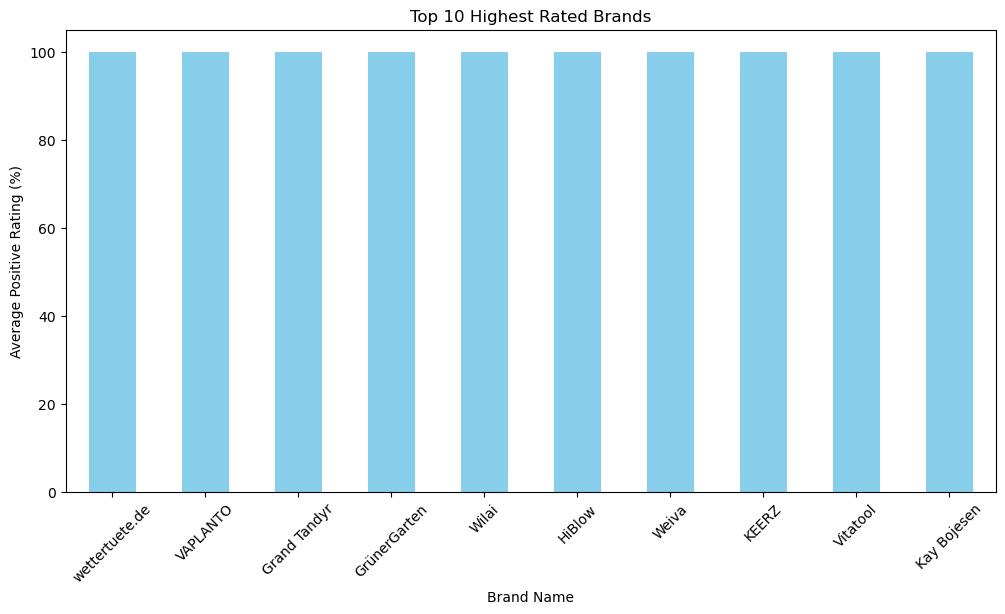

In [61]:
# 1. Identify Top-Selling Brands (by average positive rating)

highest_rated_brand = df.groupby('Sample brand name')['positive_rating in percentage'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
highest_rated_brand.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Highest Rated Brands")
plt.xlabel("Brand Name")
plt.ylabel("Average Positive Rating (%)")
plt.xticks(rotation=45)
plt.show()

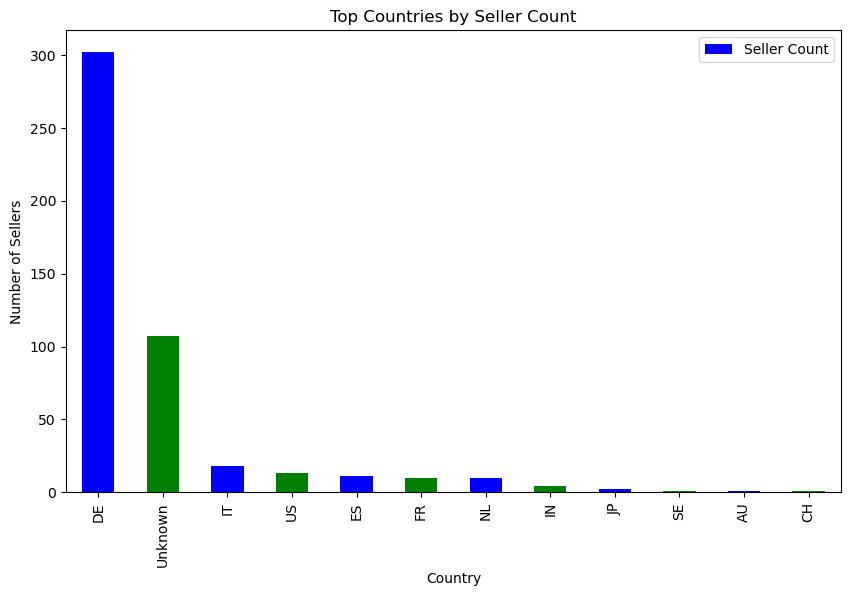

In [64]:
# 2. Seller Distribution by Country

plt.figure(figsize=(10, 6))
df['Country'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title("Top Countries by Seller Count")
plt.xlabel("Country")
plt.ylabel("Number of Sellers")
plt.legend(["Seller Count"])  # Adding legend
plt.show()

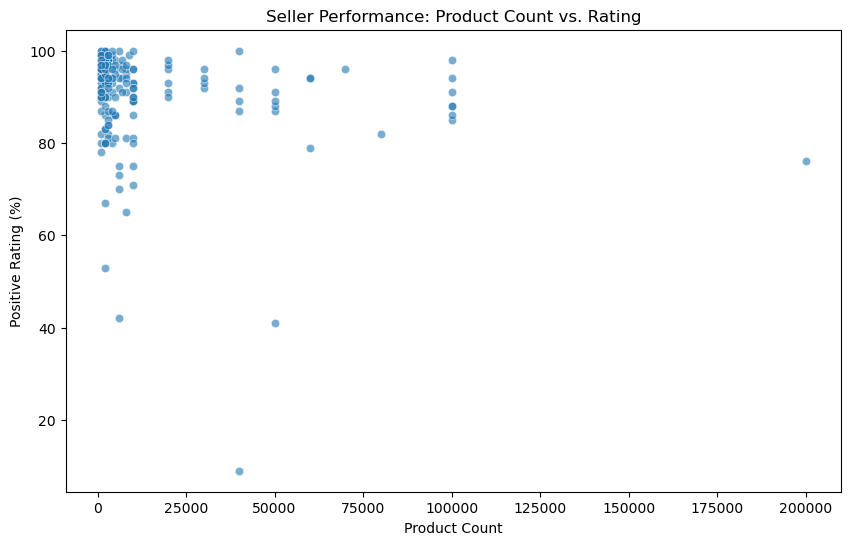

In [66]:
# 3. Best Performing Sellers (High Rating vs. Product Count)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='product_count', y='positive_rating in percentage', alpha=0.6)
plt.title("Seller Performance: Product Count vs. Rating")
plt.xlabel("Product Count")
plt.ylabel("Positive Rating (%)")
plt.show()

In [71]:
df['product_count'].min()

1000

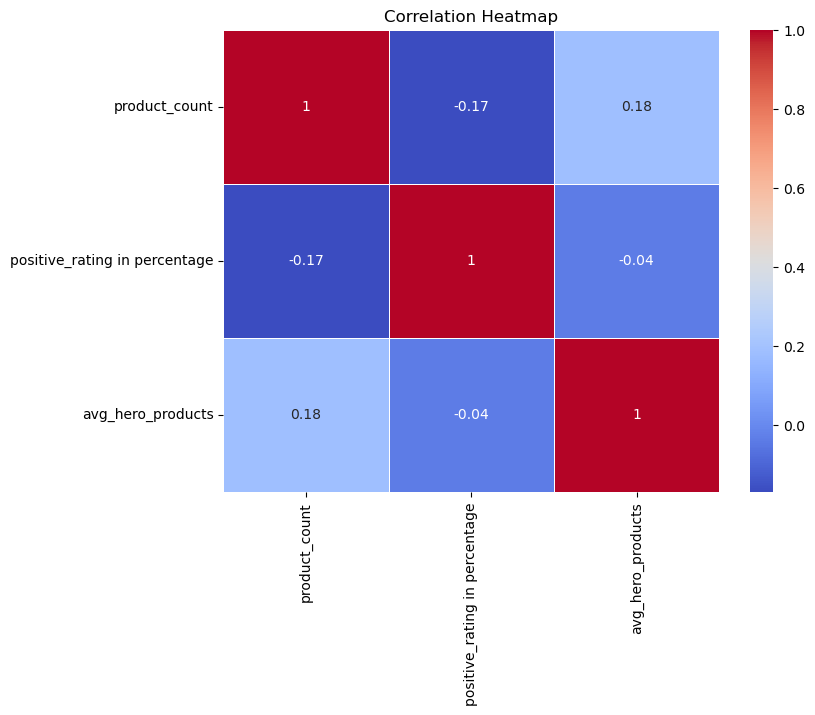

In [74]:
# 4. Correlation Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df[['product_count', 'positive_rating in percentage','avg_hero_products' ]].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

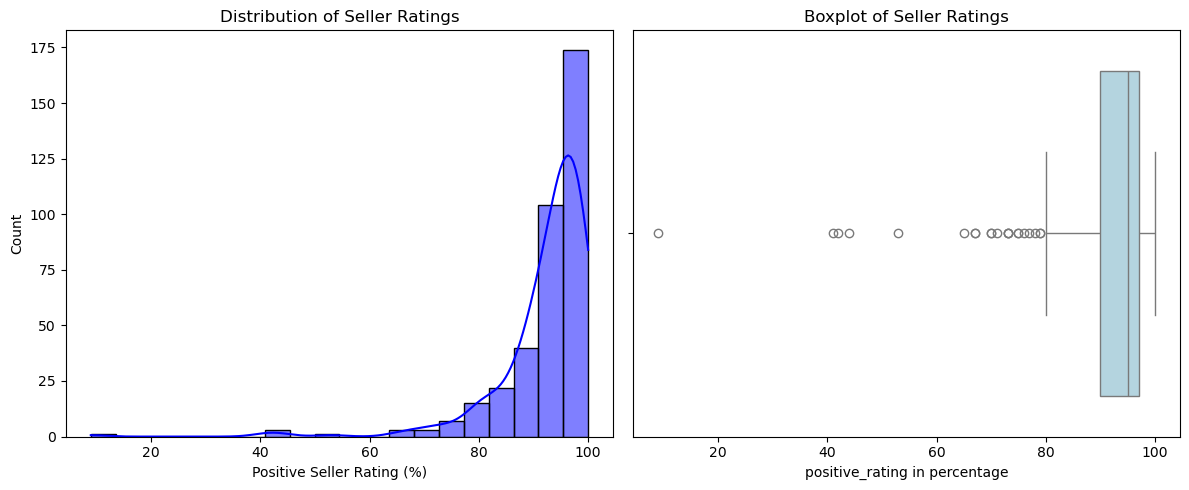

In [77]:
plt.figure(figsize=(12, 5))

# Histogram of seller ratings
plt.subplot(1, 2, 1)
sns.histplot(df['positive_rating in percentage'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Seller Ratings')
plt.xlabel('Positive Seller Rating (%)')

# Boxplot of seller ratings
plt.subplot(1, 2, 2)
sns.boxplot(x=df['positive_rating in percentage'], color='lightblue')
plt.title('Boxplot of Seller Ratings')

plt.tight_layout()
plt.show()


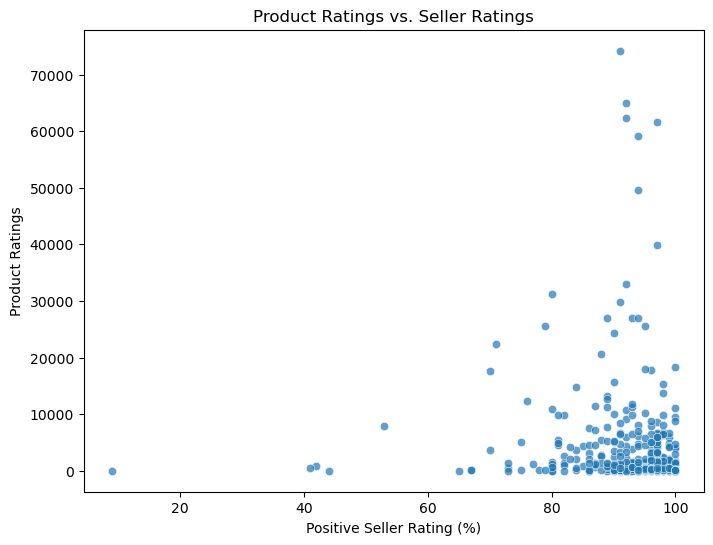

In [79]:
#  Checks if highly rated sellers also have highly rated products.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['positive_rating in percentage'], y=df['avg_hero_products'], alpha=0.7)
plt.title('Product Ratings vs. Seller Ratings')
plt.xlabel('Positive Seller Rating (%)')
plt.ylabel('Product Ratings')
plt.show()


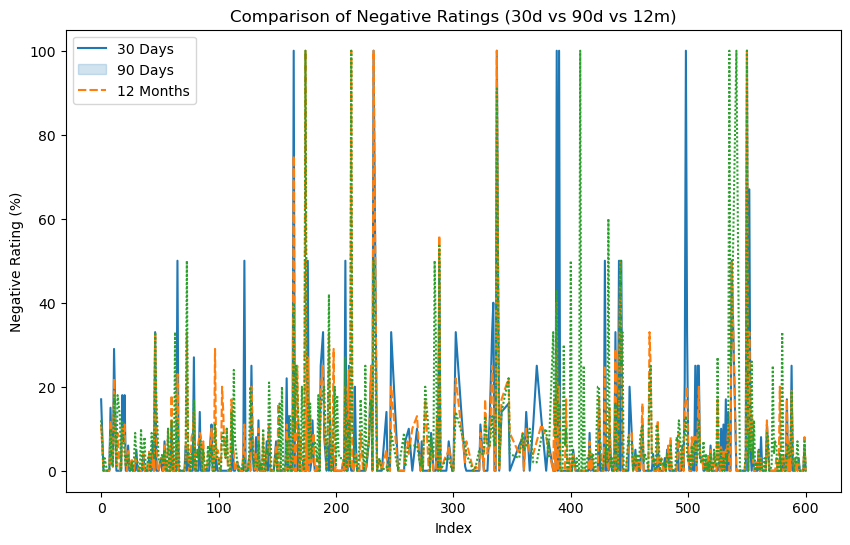

In [81]:
# Compare Negative Ratings (30d, 90d, 12m) – Line Chart

plt.figure(figsize=(10, 6))

sns.lineplot(data=df[['Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months']])
plt.xlabel('Index')
plt.ylabel('Negative Rating (%)')
plt.title('Comparison of Negative Ratings (30d vs 90d vs 12m)')
plt.legend(['30 Days', '90 Days', '12 Months'])
plt.show()


In [85]:
# Find High-Risk Sellers (High Sales but High Negative Ratings)

high_risk_sellers = df[(df['avg_hero_products'] > 1000) & (df['Max % of negative seller ratings - last 30 days'] > 50)]
high_risk_sellers

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Sample brand name,product_count,positive_rating in percentage,total_ratings given,positive_count,negative_count,Country,avg_hero_products
164,16,100,75,40,Tetra,2000,53,15,7,8,FR,7940.5
232,16,100,100,50,Weber,<NA>,<NA>,<NA>,<NA>,<NA>,IT,6841.5
498,16,100,17,13,Odie's Oil,40000,87,39,33,6,US,1150.5
552,14,67,33,9,Philips,1000,91,96,87,9,DE,6453.0


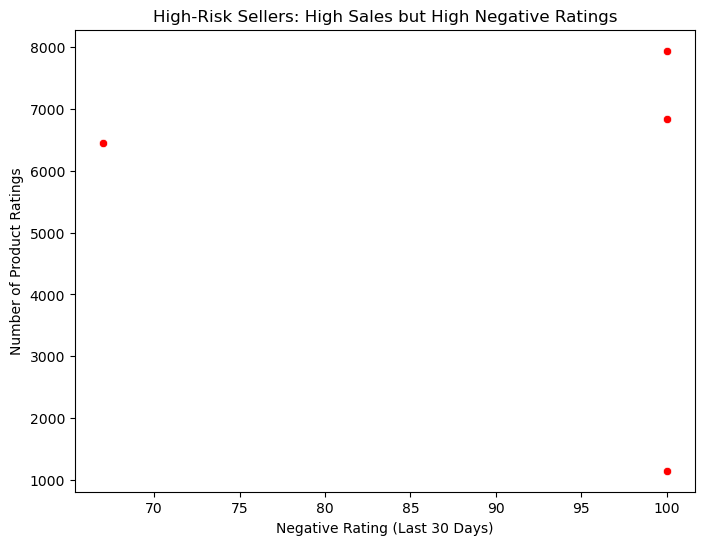

In [86]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=high_risk_sellers['Max % of negative seller ratings - last 30 days'], y=high_risk_sellers['avg_hero_products'], color='red')
plt.title('High-Risk Sellers: High Sales but High Negative Ratings')
plt.xlabel('Negative Rating (Last 30 Days)')
plt.ylabel('Number of Product Ratings')
plt.show()


In [88]:
df.columns

Index(['Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Sample brand name', 'product_count', 'positive_rating in percentage',
       'total_ratings given', 'positive_count', 'negative_count', 'Country',
       'avg_hero_products'],
      dtype='object')

In [91]:
#   Ratings Per Brand 

# Create a crosstab for Brand vs. Seller Rating Categories
df['rating_category'] = pd.cut(df['positive_rating in percentage'], bins=[0, 50, 70, 85, 100], labels=['Low', 'Average', 'Good', 'Excellent'])

# Crosstab of brand and rating category
brand_rating_crosstab = pd.crosstab(df['Sample brand name'], df['rating_category'])

brand_rating_crosstab

rating_category,Low,Average,Good,Excellent
Sample brand name,,,,
(blank),0,0,0,4
3Kamido,0,0,1,0
A.G.S.,0,0,0,1
ABC Home Garden,0,0,0,1
AS Best Product,0,0,0,1
Anzm,0,0,0,1
Aromalove,0,0,0,1
B&B,0,0,0,1
BEVO,0,0,0,1


<Axes: xlabel='Count of seller brands', ylabel='count'>

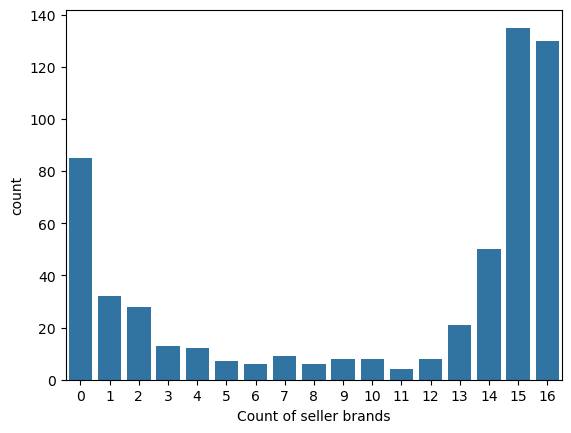

In [66]:
# Distribution of products counts across brands 

sns.countplot(x='Count of seller brands',data=df)

In [72]:
df['Sample brand name'].nunique()

446

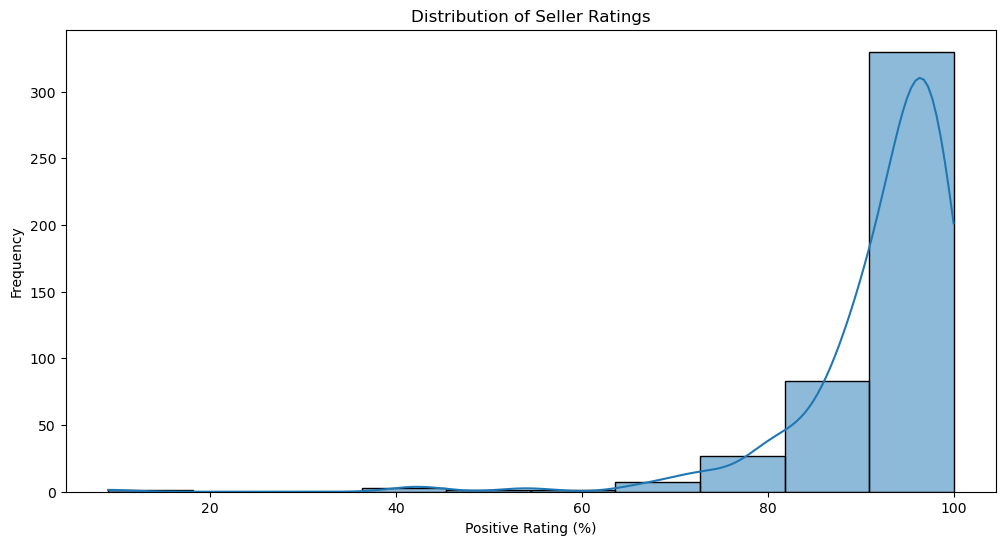

In [67]:
plt.figure(figsize=(12, 6))
sns.histplot(df['positive_rating in percentage'].dropna(), bins=10, kde=True)
plt.title("Distribution of Seller Ratings")
plt.xlabel("Positive Rating (%)")
plt.ylabel("Frequency")
plt.show()

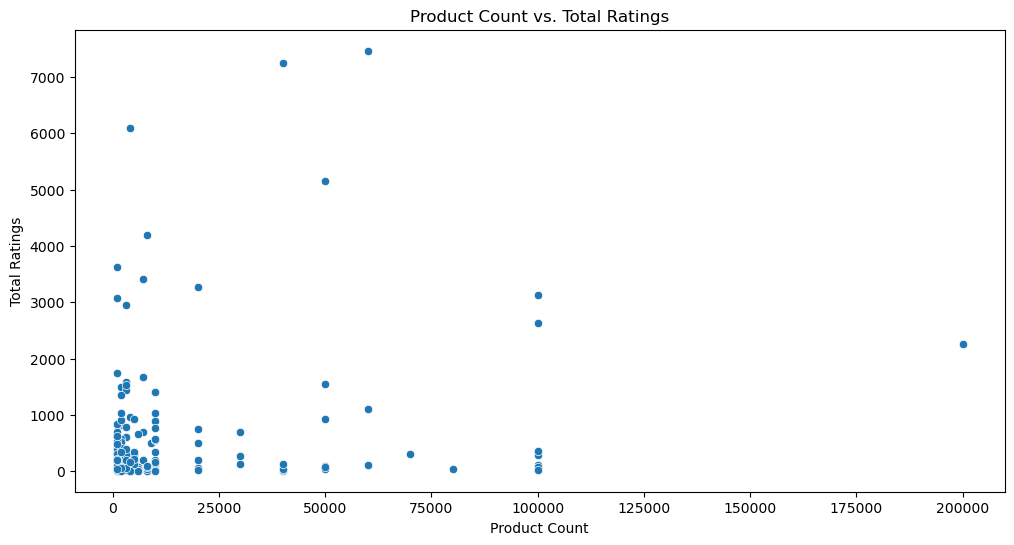

In [48]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['product_count'], y=df['total_ratings given'])
plt.title("Product Count vs. Total Ratings")
plt.xlabel("Product Count")
plt.ylabel("Total Ratings")
plt.show()


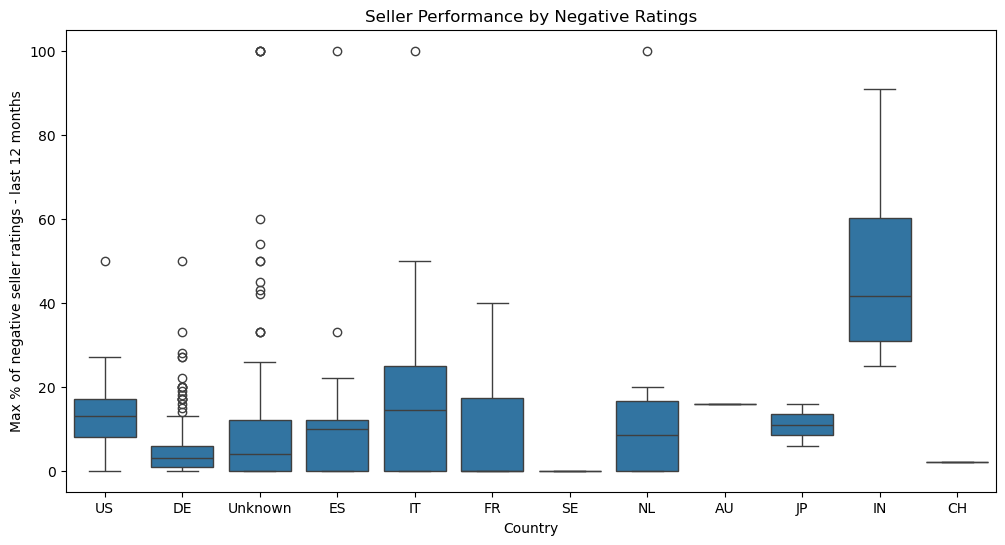

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Max % of negative seller ratings - last 12 months', data=df)
plt.title("Seller Performance by Negative Ratings")
plt.show()